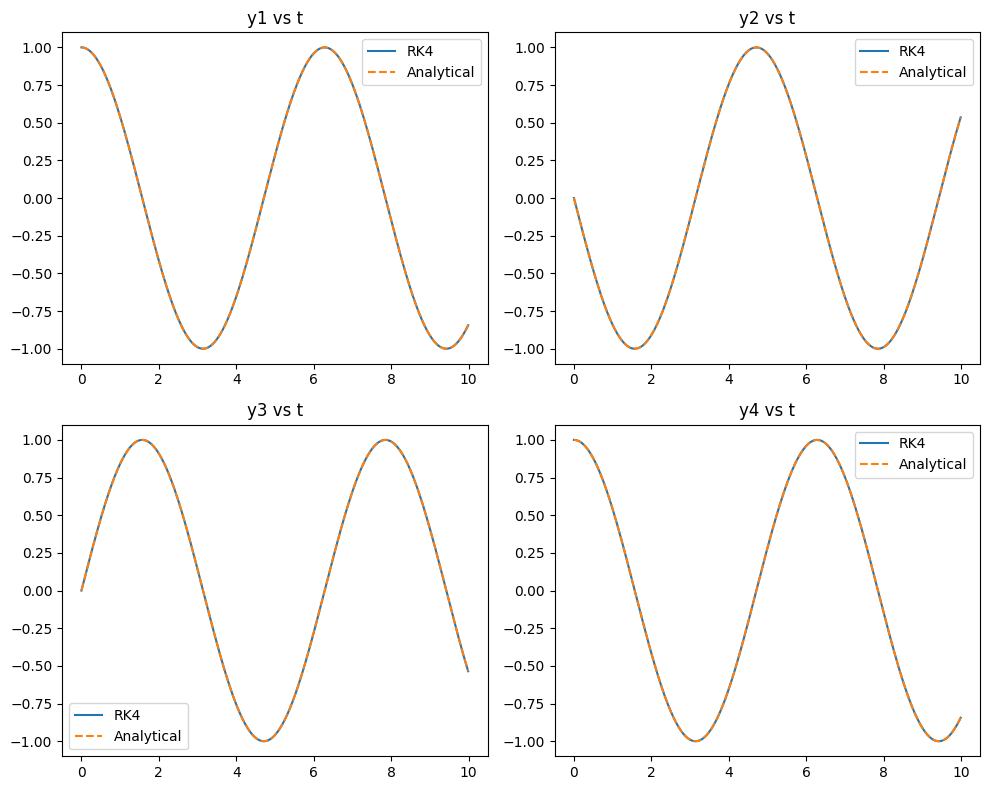

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from rk.rk4 import RungeKutta4

# Define the system of ODEs
def system(t, y):
    dy1 = y[1]
    dy2 = -y[0]
    dy3 = y[3]
    dy4 = -y[2]
    return np.array([dy1, dy2, dy3, dy4])

# Initial conditions
y0 = [1, 0, 0, 1]
t0 = 0
tf = 10
h = 0.01

# Create an instance of the RungeKutta4 class
rk4_solver = RungeKutta4(system, y0, t0, tf, h)

# Solve the system
t_values, y_values = rk4_solver.solve()

# Analytical solutions (for comparison)
y1_analytical = np.cos(t_values)
y2_analytical = -np.sin(t_values)
y3_analytical = np.sin(t_values)
y4_analytical = np.cos(t_values)

# Plot the results
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.plot(t_values, y_values[:, 0], label='RK4')
plt.plot(t_values, y1_analytical, label='Analytical', linestyle='dashed')
plt.title('y1 vs t')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(t_values, y_values[:, 1], label='RK4')
plt.plot(t_values, y2_analytical, label='Analytical', linestyle='dashed')
plt.title('y2 vs t')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(t_values, y_values[:, 2], label='RK4')
plt.plot(t_values, y3_analytical, label='Analytical', linestyle='dashed')
plt.title('y3 vs t')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(t_values, y_values[:, 3], label='RK4')
plt.plot(t_values, y4_analytical, label='Analytical', linestyle='dashed')
plt.title('y4 vs t')
plt.legend()

plt.tight_layout()
plt.show()


In [2]:
x1 = 0

def M1(n):
    a0 = 28.44 
    a1 = -0.27138
    a2 =  1.00783 * 10 **(-3)
    a3 = -1.56667 * 10 **(-6)
    a4 = 8.66667 * 10 **(-10)

    return a0 + a1 * n + a2 * (n**2) + a3 * (n**3) + a4 * (n**4)

fi0 = 28 * np.pi /180 # угол канавки
d01 = 0.055 # м начальный диаметр ведущего шкива
d02 = 0.179 # м начальный диаметр ведомого шкива


a = 0.2

# Захардокили L иначе закольцовыввются переменные
L = 2 * a + np.pi / 2 * (d01+d02)+((d02-d01) **2) / 4 * a

def get_dx1(x1):
    return d01+x1/np.tan(fi0/2) # диаметр расопложения ремня на ведущем шкиве


def R(x1):
    # print(get_dx1(x1))
    return np.sqrt(np.pi * a * (np.pi * a)/4 + L/np.pi - (2 * a)/np.pi - get_dx1(x1))


def get_x2(x1):
    return (np.pi * a + d02 - d01 - 2 * R(x1)) * np.tan(fi0 / 2) - x1


def get_dx2(x1):
    return d02-get_x2(x1)/np.tan(fi0/2) # диаметр расопложения ремня на ведомом шкиве


G_sum = 52 + 75 # кгс  

r_k = 0.265 # м радиус колеса
i_dp =  4 # передаточное число доп передачи
niu_dp = 0.9 # кпд доп передачи

f_c = 0.02 # коэфф сопротивления качению
alfpha_n = 0 # угол наклона дороги к горизонту


k_b = 0.07 # коэфф сопротивления воздуха
s = 0.5 # м2 площадь проекции транспортного средства


A = 0.8 # безразмерный коэффициент нажимных механизмов
J1 = 0.0005161 # ??кгс м2  момент инерции приведенный к ведущему валу вариатора
J02 = 0.00050342 # Собственный момент инерции ведомого шкива
J_k = 0.0191098 # Момент инерции 2 колес
G_m = 52 #  вес транспортного средства
G_n = 75 # вес водителя
g = 9.8
J2 = J02 + 1 / (i_dp**2 * niu_dp) * ((G_m / g + G_n/ g) *r_k**2 + 2 * J_k)
r0 = 0.0325 #м  начальный радиус центра тяжести шариков 
m_sh = 0.0056 # кг масса шариков

def get_DIAM(x1):
    dx1 = get_dx1(x1)
    x2 = get_x2(x1)
    dx2 = get_dx2(x2)

    return dx1/dx2

GR=G_sum * (r_k / (i_dp * niu_dp)) * (f_c * np.cos(alfpha_n) + np.sin(alfpha_n))
KR=((k_b * s * r_k**3)/((i_dp**3) * niu_dp))


def get_DP(x1):
    return ((1 / get_dx2(x1)) + (get_dx1(x1) / get_dx2(x1)**2) * (((np.pi * a) / R(x1)) - 1))


def get_RA(x1):
    return r0 + A * x1


def get_RA(x1):
    return (r0 + A * x1)

m1 = 0.03 # кгс вес подвижного диска ведущего шкива
m2 = 0.023 # кгс вес подвижного дискка ведомого шкива
c_pr = 840  # суммарная жесткость пружин ведомого шкива
x02 = 0.026 # начальнаяа деформация пружин
D = np.pi * a + d02 - d01 
dc1 = 0.035 # диаметр ступицы ведущего шкива
dc2 = 0.108 # диаметр ступицы ведомого шкива


def get_gamma(x1):
    return np.tan(((get_dx2(x1) - get_dx1(x1)) / (2 * a)) / (np.sqrt (1 - (((get_dx2(x1) - get_dx2(x1)) / 2 * a) **2))))  # угол между линией центров и ветвями ремня


alpha1 = np.pi - 2 * get_gamma(x1) # угол обхвата меньшего шкива
alpha2 = np.pi + 2 * get_gamma(x1) # угол обхвата большего шкива
alpha_c = 0.7 * alpha1 # угол скольжения от 30 вроде до 80
f_prime = 0.3 # f * sin(fio) приведенный коэффициент трения ремня и шкива 0.041
m = np.exp(alpha_c*f_prime) # m= 3.82 ... 1.77
alpha_n1 = 30 * np.pi /180 # угол покоя ведущего шкива
ro = 10 * np.pi /180 # угол трения
ro_R = 60 *  np.pi /180 # угол радиальной составляющей силы трения
alpha_n2 = 30 * np.pi /180 # угол покоя ведомого шкива
psi = m-1/m+1

lc1 = 0.022 # длина ступицы ведущего шкива
lc2 = 0.037 # длина ступицы ведомого шкива

f = 0.319 # коэффициент трения пары ремень-шкива
f_tr = 0.015 # коэффициент трения подвижной пары

def get_P(fi, x1):
    return 2 * M1(fi) / get_dx1(x1) # кгс окружная сила



Y1 = ((np.cos(fi0/2))/2*f) + (m/(m-1))*(alpha_n1 / (2 * np.tan(fi0/2+ro))) # относительная осевая сила ведущей ветви
Y2=(1 / 2 * f_prime * np.tan((fi0/2)+ro_R)) + (1/ m - 1) * (alpha_n2 / (2 * np.tan((fi0 / 2) + ro))) # относительная осевая сила ведомой ветви
Tetta = Y1/Y2 # отношение потребных относительных осевых сил вариатора

# np
def get_MP(x1):
    return (1 / 2) * m2 * ((np.pi**2 * a**2) / R(x1)**3) * (((np.pi * a) / R(x1)) - 1) * 1/np.tan(fi0 / 2) # исправил 1/tg на 1/cot

def get_CP(x1):
    return c_pr * (x02 + ((D - 2 * R(x1)) * np.tan(fi0 / 2)) - x1)


def get_TD(x1):
    return (get_dx1(x1) / dc1) + Tetta * (get_dx2(x1) / dc2) + ((np.cos(get_gamma(x1))) / psi) * (1 + Tetta)


def get_YD(x1):
    return ((get_dx1(x1) / lc1) * abs((np.sin(alpha1) / alpha1)) + (get_dx2(x1) / lc2) * abs((np.sin(alpha2) / alpha2)))


def get_MS(x1):
    return (m1 + m2 * ((((np.pi * a)) / R(x1)) - 1)**2 + m_sh * A**2)


In [10]:
def coupled_system_of_odes(t, vars):
        omega, fi, v, x1 = vars

        omega_dot = (M1(fi) - (get_DIAM(x1)) * GR - (get_DIAM(x1))**3 * KR * omega**2 - J2 * (fi0 / 2) * \
                (get_DIAM(x1)) * (get_DP(x1)) * omega * v - 2 * m_sh * A * (get_RA(x1)) * omega * v) / \
                (J1 + J2 * (get_DIAM(x1))**2 + m_sh * (get_RA(x1))**2) 

        fi_dot = omega

        v_dot = (m_sh * A * (get_RA(x1)) * omega**2 - (get_MP(x1)) * v - Tetta * (get_CP(x1)) - np.sign(v) * \
                get_P(fi, x1) * f_tr * ((get_TD(x1)) + Y1 * (get_YD(x1)))) / (get_MS(x1))

        x1_dot = v
        print(f"t={t} x1={x1} x2={get_x2(x1)} dx1={get_dx1(x1)} dx2={get_dx2(x1)} omega_dot={omega_dot} omega={omega} v_dot={v_dot} x1_dot={x1_dot}")

        return np.array([omega_dot, fi_dot, v_dot, x1_dot])

In [12]:
# Initial conditions
initial_conditions = [360.0, 0.0, 0.0, 0.0] #omega, fi, v, x1
t0 = 0
tf = 1
h = 0.001

# Create an instance of the RungeKutta4 class
rk4_solver = RungeKutta4(coupled_system_of_odes, initial_conditions, t0, tf, h)

# Solve the system
t_values, y_values = rk4_solver.solve()


t=0.0 x1=0.0 x2=-0.012473861004924727 dx1=0.055 dx2=0.22902992388612836 omega_dot=10054.60129568531 omega=360.0 v_dot=-1121.3413688743399 x1_dot=0.0
t=0.0005 x1=0.0 x2=-0.012473861004924727 dx1=0.055 dx2=0.22902992388612836 omega_dot=11143.826828940682 omega=365.02730064784265 v_dot=6610.226665779123 x1_dot=-0.5606706844371699
t=0.0005 x1=-0.00028033534221858495 x2=-0.012891096460234546 dx1=0.05387563635443345 dx2=0.23070336389508012 omega_dot=3920.167330976367 omega=365.5719134144703 v_dot=-8992.501302301775 x1_dot=3.3051133328895617
t=0.001 x1=0.0033051133328895616 x2=-0.007363362077378328 dx1=0.06825608553872856 dx2=0.20853283222666988 omega_dot=22461.41139128109 omega=363.92016733097637 v_dot=4268.01192893651 x1_dot=-8.992501302301775
t=0.001 x1=-0.0005839360008994986 x2=-0.013340234853198425 dx1=0.05265796062118712 dx2=0.23250475959809858 omega_dot=11535.983050761104 omega=370.44066683446675 v_dot=7118.352788661163 x1_dot=-0.2696464521638557
t=0.0015 x1=-0.0007187592269814265 x2=-

/tmp/ipykernel_12882/3394247498.py:28: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.pi * a * (np.pi * a)/4 + L/np.pi - (2 * a)/np.pi - get_dx1(x1))


t=0.381 x1=nan x2=nan dx1=nan dx2=nan omega_dot=nan omega=nan v_dot=nan x1_dot=nan
t=0.3815 x1=nan x2=nan dx1=nan dx2=nan omega_dot=nan omega=nan v_dot=nan x1_dot=nan
t=0.3815 x1=nan x2=nan dx1=nan dx2=nan omega_dot=nan omega=nan v_dot=nan x1_dot=nan
t=0.382 x1=nan x2=nan dx1=nan dx2=nan omega_dot=nan omega=nan v_dot=nan x1_dot=nan
t=0.382 x1=nan x2=nan dx1=nan dx2=nan omega_dot=nan omega=nan v_dot=nan x1_dot=nan
t=0.3825 x1=nan x2=nan dx1=nan dx2=nan omega_dot=nan omega=nan v_dot=nan x1_dot=nan
t=0.3825 x1=nan x2=nan dx1=nan dx2=nan omega_dot=nan omega=nan v_dot=nan x1_dot=nan
t=0.383 x1=nan x2=nan dx1=nan dx2=nan omega_dot=nan omega=nan v_dot=nan x1_dot=nan
t=0.383 x1=nan x2=nan dx1=nan dx2=nan omega_dot=nan omega=nan v_dot=nan x1_dot=nan
t=0.3835 x1=nan x2=nan dx1=nan dx2=nan omega_dot=nan omega=nan v_dot=nan x1_dot=nan
t=0.3835 x1=nan x2=nan dx1=nan dx2=nan omega_dot=nan omega=nan v_dot=nan x1_dot=nan
t=0.384 x1=nan x2=nan dx1=nan dx2=nan omega_dot=nan omega=nan v_dot=nan x1_dot=na

In [10]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt



# Time span 
t_span = (0, 0.5)
t_eval = np.linspace(t_span[0], t_span[1], 200)

# Define a callback function to print intermediate results
def verbose_output(t, y):
    omega, phi, v, x1 = y
    omega_dot, phi_dot, v_dot, x1_dot = coupled_system_of_odes(t, [omega, phi, v, x1])
    # print(f"At time t={t:.2f}: omega={omega:.4f}, phi={phi:.4f}, v={v:.4f}, x1={x1:.4f}")
    # print(f"Derivatives: omega_dot={omega_dot:.4f}, phi_dot={phi_dot:.4f}, v_dot={v_dot:.4f}, x1_dot={x1_dot:.4f}")

# Define an event function to call at each integration step
def event(t, y):
    verbose_output(t, y)
    return 0

# Set event to be terminal=False and direction=0 to trigger at each step
event.terminal = False
event.direction = 0

# Solve the system of ODEs using a stiff solver
solution = solve_ivp(
    coupled_system_of_odes, t_span, initial_conditions, 
    method='LSODA', t_eval=t_eval, events=event, #BDF
    rtol=1e-3, atol=1e-6
)

# Check if the solver was successful
if solution.success:
    # Extract the solution for each variable
    omega, phi, v, x1 = solution.y

    # Plot the results
    plt.figure(figsize=(14, 10))

    plt.subplot(2, 2, 1)
    plt.plot(solution.t, omega, label='omega(t)')
    plt.xlabel('Time t')
    plt.ylabel('omega(t)')
    plt.legend()
    plt.grid(True)

    plt.subplot(2, 2, 2)
    plt.plot(solution.t, phi, label='phi(t)')
    plt.xlabel('Time t')
    plt.ylabel('phi(t)')
    plt.legend()
    plt.grid(True)

    plt.subplot(2, 2, 3)
    plt.plot(solution.t, v, label='v(t)')
    plt.xlabel('Time t')
    plt.ylabel('v(t)')
    plt.legend()
    plt.grid(True)

    plt.subplot(2, 2, 4)
    plt.plot(solution.t, x1, label='x1(t)')
    plt.xlabel('Time t')
    plt.ylabel('x1(t)')
    plt.legend()
    plt.grid(True)

    plt.suptitle('Solution of the Coupled System of Nonlinear ODEs')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    # Log solver statistics
    print("Solver Statistics:")
    print(f"Number of function evaluations: {solution.nfev}")
    print(f"Number of Jacobian evaluations: {solution.njev}")
    print(f"Number of LU decompositions: {solution.nlu}")
else:
    print("The solver failed to find a solution.")

capi_return is NULL
Call-back cb_f_in_lsoda__user__routines failed.


KeyboardInterrupt: 